# This code benchmarks to the supplementary dataset of Coogan et al. 
- Slight discrepencies likely reflect different choice of molar masses, e.g., we can recreate their Cr# column better using rounded molar masses

In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import sympy as sym
pd.options.display.max_columns = None
import inspect
from functools import partial
import Thermobar as pt

In [4]:
out=pt.import_excel('Supplement_for_Coogan_2014.xlsx', sheet_name="Input_for_PTthermobar")
# All the outputs are stored in a dictioary "out" which searches for all possible minerals (e.g., ol, liq, cpx, plag, amp). 
#The ones you don't have will just be filled with zeros. Then, subsample the ones you want
my_input=out['my_input']
myOls1=out['Ols']
mySps1=out['Sps']

In [5]:
display(mySps1.head())
display(myOls1.head())

,SiO2_Sp,TiO2_Sp,Al2O3_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,Cr2O3_Sp,NiO_Sp,Sample_ID_Sp
0,0.0,0.248333,40.098667,11.805333,0.168667,19.131667,0.006667,0.000667,0.0,27.107333,0.239000,0
1,0.0,0.262000,41.726000,11.424000,0.144000,19.511000,0.039000,0.000000,0.0,25.019000,0.259000,1
2,0.0,0.269375,38.993875,11.416375,0.153375,19.070125,0.009875,0.000625,0.0,26.682125,0.239250,2
3,0.0,0.241000,37.076000,12.317333,0.163333,18.943000,0.027667,0.004667,0.0,29.626667,0.261333,3
4,0.0,0.241000,37.076000,12.317333,0.163333,18.943000,0.027667,0.004667,0.0,29.626667,0.261333,4


,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol
0,40.949250,0.0,0.067000,8.854000,0.144750,49.306500,0.296000,0.000250,0.0,0.059750,0.313750,0
1,40.939000,0.0,0.041250,8.949750,0.134000,49.520875,0.290000,0.003375,0.0,0.067125,0.329375,1
2,40.812222,0.0,0.037444,8.573111,0.147667,49.136667,0.291278,0.003000,0.0,0.050833,0.307000,2
3,40.869357,0.0,0.033500,8.819500,0.143571,49.324143,0.292357,0.003714,0.0,0.052714,0.317929,3
4,40.862600,0.0,0.052000,8.816200,0.149800,49.052400,0.291400,0.002400,0.0,0.054600,0.300600,4


## No tool, but comparing to values in the supplement. Discrepencies small, probably related to different molar masses etc. 

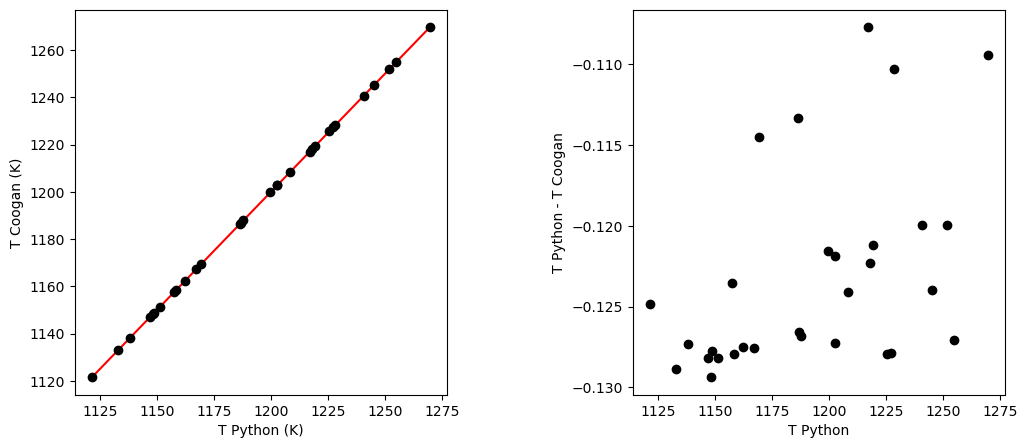

In [6]:
# Discrepencies likely due to rounded molar masses
T_Put=my_input['T (°C)'] 
T_py=pt.calculate_ol_sp_temp(ol_comps=myOls1, sp_comps=mySps1, equationT="T_Coogan2014")-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Coogan (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Coogan')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

In [8]:
T_py+273.15

0     1518.247501
1     1421.447530
2     1411.294832
3     1394.570203
4     1475.740589
5     1430.727705
6     1524.881854
7     1492.575600
8     1475.779454
9     1513.720923
10    1472.839068
11    1481.474491
12    1459.458320
13    1442.625918
14    1542.691566
15    1527.921639
16    1500.358136
17    1498.698061
18    1491.046582
19    1501.430792
20    1490.059192
21    1440.154019
22    1424.473166
23    1419.990494
24    1421.736664
25    1406.178965
26    1435.396033
27    1459.957944
28    1431.325173
29    1460.936803
dtype: float64

In [11]:
pt.calculate_ol_sp_temp(ol_comps=myOls1, sp_comps=mySps1, equationT="T_Wan2008")

0     1514.408706
1     1416.655899
2     1406.556908
3     1389.863838
4     1471.708470
5     1426.308655
6     1521.309233
7     1488.696536
8     1471.454470
9     1510.062023
10    1468.801353
11    1477.362471
12    1455.737739
13    1438.734600
14    1539.785961
15    1523.984895
16    1496.171791
17    1494.497064
18    1487.097874
19    1498.160820
20    1486.823893
21    1435.578462
22    1419.766088
23    1415.255365
24    1417.035092
25    1401.324878
26    1430.794555
27    1455.564963
28    1426.675446
29    1456.535991
dtype: float64